In [8]:
#library
from imageio import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.metrics import classification_report


In [9]:
def loadImages(dirName):
    # This function loads images from any directory
    # :param str dirName: is address of the directory (string)
    data = []
    label = []
    for root, dirs, files in os.walk(dirName):
        for file in files:
            face = imread(os.path.join(root, file)) # Load image from a path
            face = face.reshape(256 * 256, ).tolist()          # Flatten image . Note: size of any image is 256,256
            data.append(face)
            label.append(file.split('.')[1])                   # Label of an image is in its fileName
    return np.asarray(data) , label



In [13]:
#train, test
X_train , y_train = loadImages(r'C:\Users\AU\far\khodam\FACES\train')
X_test , y_test = loadImages(r'C:\Users\AU\far\khodam\FACES\test')


# 4-1

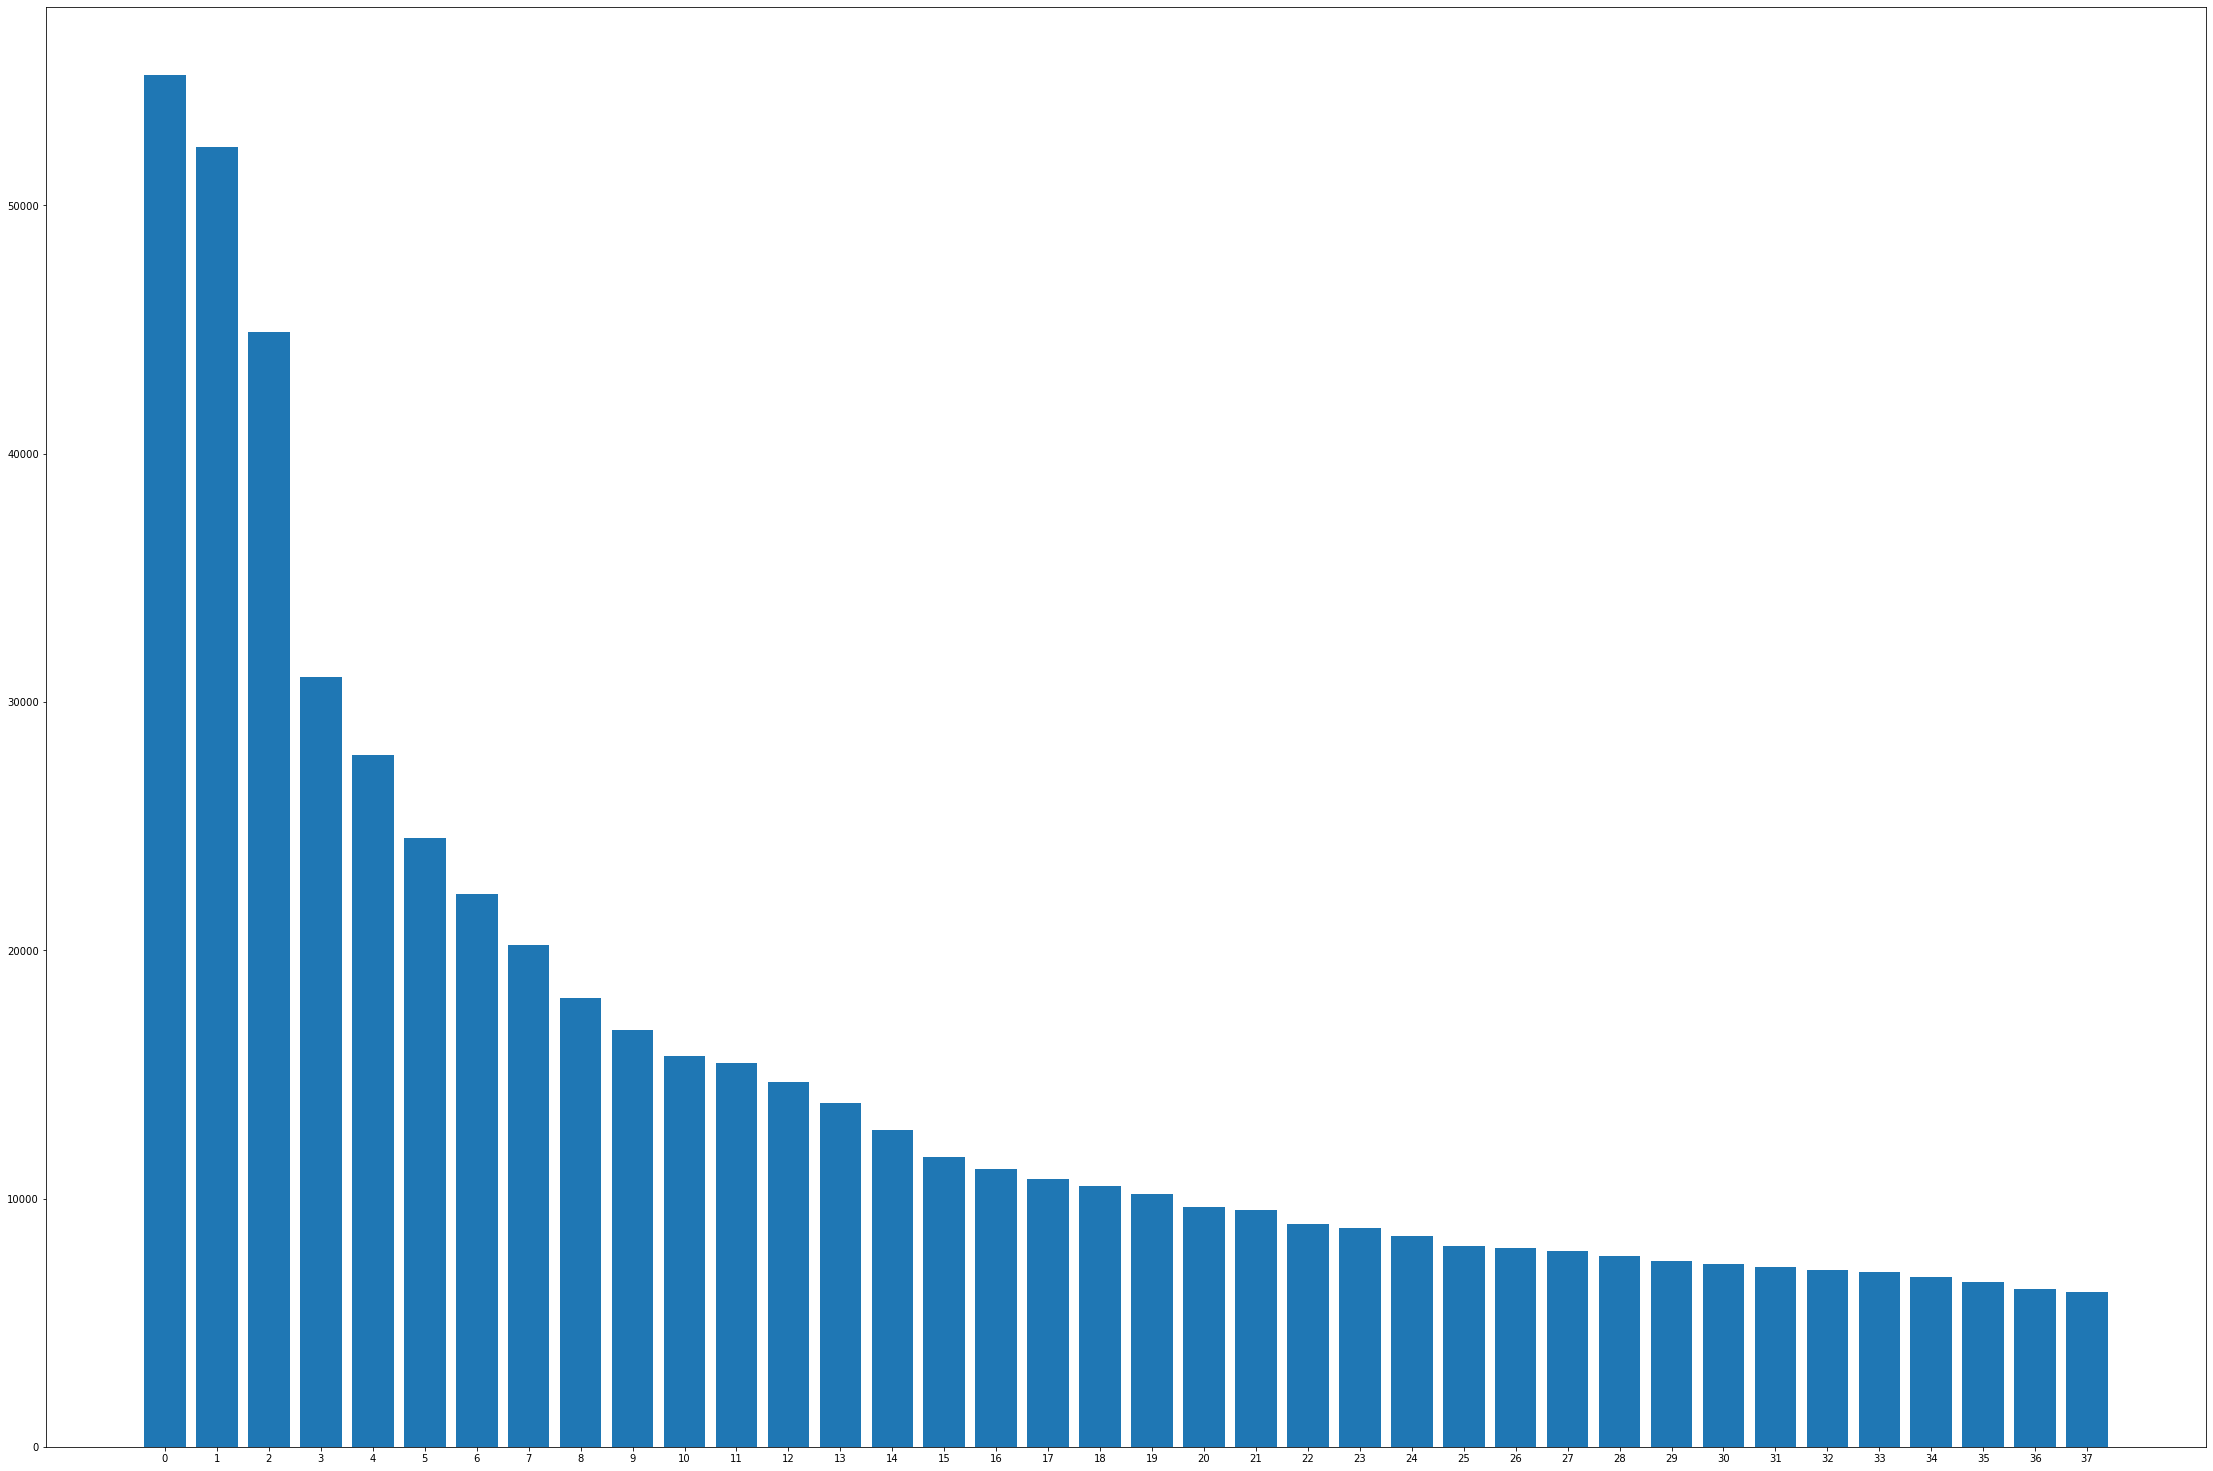

In [17]:

p = PCA(n_components=0.9)
p.fit(X_train)

X_train_p = p.transform(X_train)
X_test_p = p.transform(X_test)

fig = plt.figure()
ax = fig.add_axes([0,0,5,5])

pstr = [ str(i) for i in range(len(p.singular_values_)) ]
ax.bar(pstr,p.singular_values_)
plt.show()

# 4-2

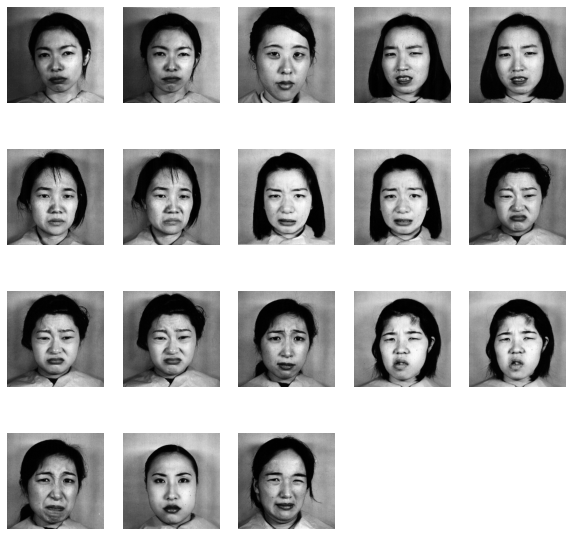

In [20]:
#original faces

y_train_d = [i for i in range(len(y_train)) if y_train[i] == 'disgust']
fig = plt.figure(figsize=(10, 10))
for i in range(len(y_train_d)):
    fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow(X_train[y_train_d[i]].reshape(256,256), cmap='gray')

In [21]:
#removing pca components
def rpc(X, c_index, mode = "keep"):
    for i, j in enumerate(c_index):
        if j < 0:
            c_index[i] = len(X) + j
    result = np.copy(X)
    for i in range(len(result)):
        if mode == "keep":
            if i not in c_index:
                result[i] = 0
        else:
            if i in c_index:
                result[i] = 0
    return result

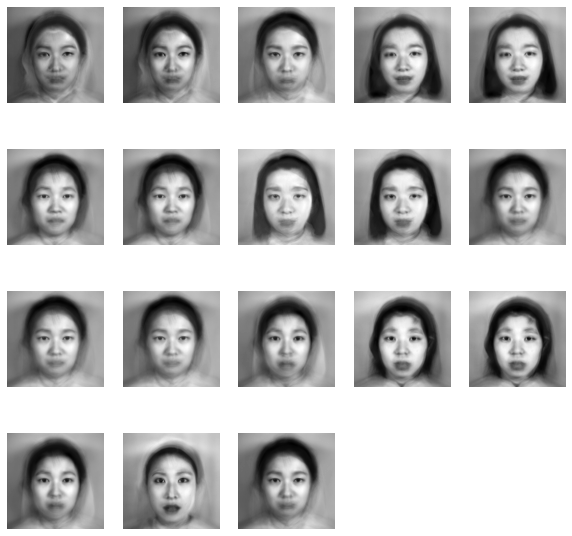

In [24]:
##PCA90% PICTURES, 4 first 

y_train_d = [i for i in range(len(y_train)) if y_train[i] == 'disgust']
fig = plt.figure(figsize=(10, 10))
for i in range(len(y_train_d)):
    fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow((p.inverse_transform(rpc(X_train_p[y_train_d[i]], [0,1,2,3],'keep'))).reshape(256,256), cmap='gray')

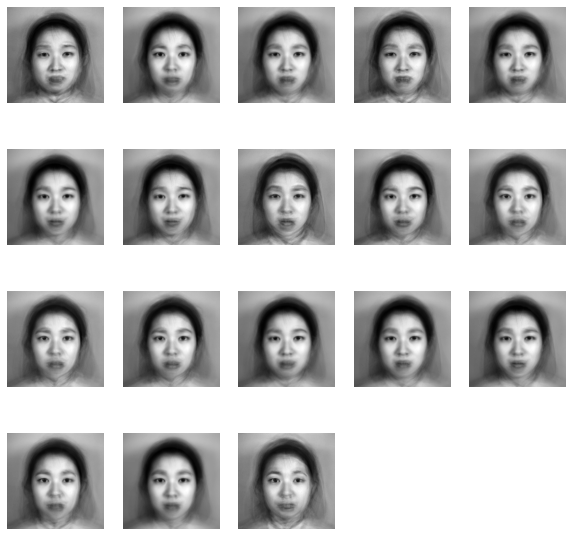

In [25]:
##PCA90% PICTURES, 4 last 

y_train_d = [i for i in range(len(y_train)) if y_train[i] == 'disgust']
fig = plt.figure(figsize=(10, 10))
for i in range(len(y_train_d)):
    fig.add_subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow((p.inverse_transform(rpc(X_train_p[y_train_d[i]], [-1,-2,-3,-4],'keep'))).reshape(256,256), cmap='gray')

# 4-3

"original data, nearest neighbors = 1"
CCR : 0.847457627118644
confusion matrix: 


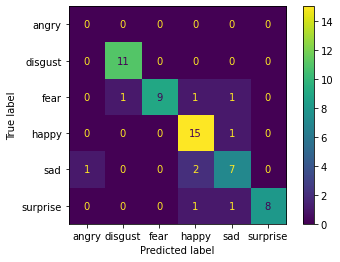

******************
"PCA data, nearest neighbors = 1"
CCR : 0.7966101694915254
confusion matrix: 


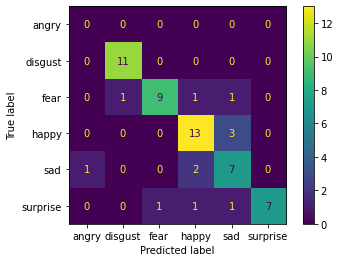

******************
"original data, nearest neighbors = 2"
CCR : 0.6271186440677966
confusion matrix: 


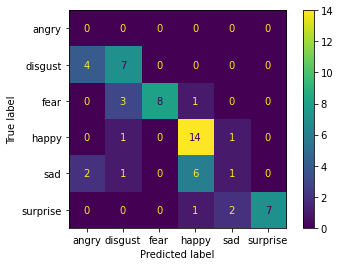

******************
"PCA data, nearest neighbors = 2"
CCR : 0.5932203389830508
confusion matrix: 


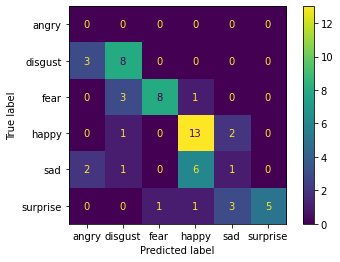

0.5932203389830508

In [27]:
# knn clasiification report
def KNN_report(label , X_train, y_train, X_test, y_test, neighbors, f = True):
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    knn.fit(X_train, y_train)
    knn_p = knn.predict(X_test)

    # print CCR and confusion matrix
    ccr = accuracy_score(y_test, knn_p)
    o = metrics.confusion_matrix(y_test, knn_p)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=o, display_labels=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise'])
    
    if f:
        print("\"" + label + "\"")
        print('CCR : ' + str(ccr))
        print('confusion matrix: ')
        cm_display.plot()
        plt.show()
    return ccr
    
KNN_report('original data, nearest neighbors = 1',X_train, y_train, X_test, y_test, 1)
print('******************')
KNN_report('PCA data, nearest neighbors = 1',X_train_p, y_train, X_test_p, y_test, 1)
print('******************')
KNN_report('original data, nearest neighbors = 2',X_train, y_train, X_test, y_test, 2)
print('******************')
KNN_report('PCA data, nearest neighbors = 2',X_train_p, y_train, X_test_p, y_test, 2)

# 4-4


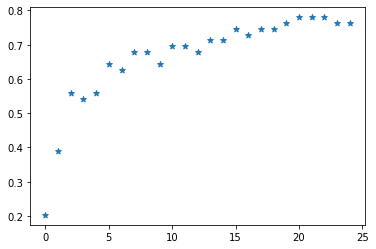

In [34]:
A = []
for i in range(1, len(X_train[0])):
    p4 = PCA(n_components=i)
    p4.fit(X_train)
    X_train_p4 = p4.transform(X_train)
    X_test_p4 = p4.transform(X_test)
    A.append(KNN_report('',X_train_p4, y_train, X_test_p4, y_test, 1, False))
    if i == 25:
        break;
plt.scatter([i for i in range(25)], A, marker='*');
    